# Linear Regression using PyTorch

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

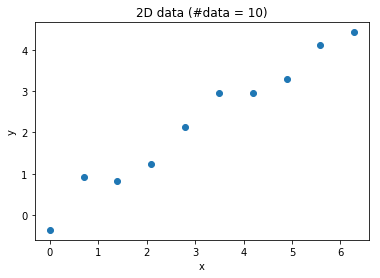

In [82]:
N = 10 # number of data points
m = .7
c = 0
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [83]:
import torch

## Dataset

In [84]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [85]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.]) tensor([-0.3616])
1 tensor([1.0000, 0.6981]) tensor([0.9284])
2 tensor([1.0000, 1.3963]) tensor([0.8178])
3 tensor([1.0000, 2.0944]) tensor([1.2363])
4 tensor([1.0000, 2.7925]) tensor([2.1312])
5 tensor([1.0000, 3.4907]) tensor([2.9595])
6 tensor([1.0000, 4.1888]) tensor([2.9616])
7 tensor([1.0000, 4.8869]) tensor([3.2856])
8 tensor([1.0000, 5.5851]) tensor([4.1204])
9 tensor([1.0000, 6.2832]) tensor([4.4299])


## Dataloader

In [86]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [87]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 0.0000],
        [1.0000, 6.2832],
        [1.0000, 2.7925]]),
 'label': tensor([[ 3.2856],
        [-0.3616],
        [ 4.4299],
        [ 2.1312]])}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 4.1888],
        [1.0000, 2.0944],
        [1.0000, 5.5851]]),
 'label': tensor([[0.9284],
        [2.9616],
        [1.2363],
        [4.1204]])}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 3.4907]]),
 'label': tensor([[0.8178],
        [2.9595]])}


## Model

In [88]:
import torch.nn as nn
from torch.nn.parameter import Parameter
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        
        self.weight = Parameter(torch.Tensor(output_dim, input_dim))
        self.bias = Parameter(torch.Tensor(output_dim, 1))
        
        stdv = 1.
        self.weight.data.uniform_(-stdv, stdv)
        self.bias.data.uniform_(-stdv, stdv)
        
    def forward(self, x):
        weight_and_bias = torch.cat((self.weight, self.bias), 1)
        #print(weight_and_bias)
        #print(weight_and_bias.t().shape)
        #print(x.shape)
        #print(self.weight.size())
        
        out = x.matmul(weight_and_bias.t())
        return out

### Setting a model for our problem

In [89]:
input_dim = 1
output_dim = 1

model = MyModel(input_dim, output_dim)

model(torch.rand([5,2]))

tensor([[-0.2284],
        [-0.2998],
        [-0.3345],
        [-0.4379],
        [-0.4926]], grad_fn=<MmBackward>)

## Cost function

Often called loss or error

In [90]:
cost = nn.MSELoss()

## Minimizing the cost function

In other words training (or learning from data)

In [91]:
num_epochs = 100  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    if epoch % 10 == 0:
        print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        if epoch % 10 == 0:
            print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()
        
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 16.70507049560547
	Batch = 1, Error = 8.13081169128418
	Batch = 2, Error = 5.611606597900391
Epoch = 10
	Batch = 0, Error = 0.038061268627643585
	Batch = 1, Error = 0.07505239546298981
	Batch = 2, Error = 0.15835535526275635
Epoch = 20
	Batch = 0, Error = 0.08792252838611603
	Batch = 1, Error = 0.01075046882033348
	Batch = 2, Error = 0.1661089062690735
Epoch = 30
	Batch = 0, Error = 0.05161896347999573
	Batch = 1, Error = 0.13463875651359558
	Batch = 2, Error = 0.015191728249192238
Epoch = 40
	Batch = 0, Error = 0.017340095713734627
	Batch = 1, Error = 0.09204908460378647
	Batch = 2, Error = 0.15492799878120422
Epoch = 50
	Batch = 0, Error = 0.08469688147306442
	Batch = 1, Error = 0.047444503754377365
	Batch = 2, Error = 0.13100163638591766
Epoch = 60
	Batch = 0, Error = 0.02969956025481224
	Batch = 1, Error = 0.03639977052807808
	Batch = 2, Error = 0.24547162652015686
Epoch = 70
	Batch = 0, Error = 0.06779415160417557
	Batch = 1, Error = 0.050176568329334

## Lets see how well the model has learnt the data

In [92]:
#from torch.autograd.variable import Variable

x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
#print('Design matrix:\n', design_matrix)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


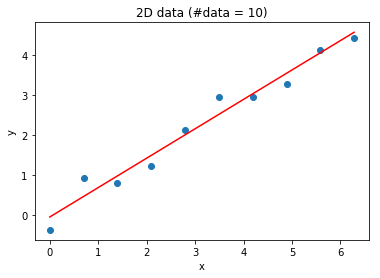

In [93]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()